In [1]:
import pdb


import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import theano
import pandas as pd
print(f"Running on PyMC3 v{pm.__version__}")
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

Running on PyMC3 v3.11.2


In [2]:
samples = 2500
tune = 2500

In [3]:
# data = pd.read_csv('test_lme_data.csv')
# data_clust1 = pd.read_csv('FaNoOcc_NeNoOcc_insta_abs_corr_avg_freqwise_lme_cluster_1_data_IBS.csv')
data_clust1 = pd.read_csv('FaNoOcc_NeNoOcc_insta_abs_detrend_lme_smile_cluster_beta_data_IBS.csv')
# data_clust1.head()
# data = data.iloc[0:7000,]
data_clust1.condition = data_clust1.condition_Smile_auto.str.split("_",n=1, expand = True)[1]
data_clust1.condition = data_clust1.condition.astype('int')

<ipython-input-3-0d4661f9010a>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_clust1.condition = data_clust1.condition_Smile_auto.str.split("_",n=1, expand = True)[1]


In [4]:
n_dyads = len(data_clust1.Dyad_no_Gaze_nose_dist.unique())
dyad_idx = np.array(data_clust1.Dyad_no_Gaze_nose_dist.str.split("_",n=1, expand = True)[1],dtype='int64')-1

with pm.Model() as hierarchical_model_clust_1_null:
    # Hyperpriors for group nodes
    mu_intercept = pm.Normal("mu_intercept", mu=0.0, sigma=100)
    sigma_intercept = pm.HalfNormal("sigma_intercept", 5.0)
    mu_eye_gaze = pm.Normal("mu_eye_gaze", mu=0.0, sigma=100)
    sigma_eye_gaze = pm.HalfNormal("sigma_eye_gaze", 5.0)    
  
    mu_mouth_size = pm.Normal("mu_mouth_size", mu=0.0, sigma=100)
    sigma_mouth_size = pm.HalfNormal("sigma_mouth_size", 5.0)  
    
    mu_mov = pm.Normal("mu_mov", mu=0.0, sigma=100)
    sigma_mov = pm.HalfNormal("sigma_mov", 5.0)     
    
    
    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    intercept = pm.Normal("intercept", mu=mu_intercept, sigma=sigma_intercept, shape=n_dyads)
    # Intercept for each county, distributed around group mean mu_a
    eye_gaze = pm.Normal("eye_gaze", mu=mu_eye_gaze, sigma=sigma_eye_gaze, shape=n_dyads)
    mouth_size = pm.Normal("mouth_size", mu=mu_mouth_size, sigma=sigma_mouth_size, shape=n_dyads)
    mov = pm.Normal("mov", mu=mu_mov, sigma=sigma_mov, shape=n_dyads)
    # Model error
    eps = pm.HalfCauchy("eps", 5.0)
    #pdb.set_trace()
#     feature_est = intercept[dyad_idx]  + condition[dyad_idx] * data.condition.values +  eye_gaze[dyad_idx] * data.eye_gaze_distance_joint.values + mouth_size[dyad_idx] * data.mouth_size_joint.values + e[dyad_idx] * data.ALL.values
    feature_est = intercept[dyad_idx] 

    # Data likelihood
    feature_like = pm.Normal("feature_like", mu=feature_est, sigma=eps, observed=data_clust1.chan_freq_data)
#     hierarchical_trace_clust_1_null = pm.sample(5000, tune=5000, target_accept=0.99)
    hierarchical_trace_clust_1_null = pm.sample(samples, tune=tune, target_accept=0.99)

<ipython-input-4-1639729bb11d>:36: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  hierarchical_trace_clust_1_null = pm.sample(samples, tune=tune, target_accept=0.99)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, mov, mouth_size, eye_gaze, intercept, sigma_mov, mu_mov, sigma_mouth_size, mu_mouth_size, sigma_eye_gaze, mu_eye_gaze, sigma_intercept, mu_intercept]


Sampling 4 chains for 2_500 tune and 2_500 draw iterations (10_000 + 10_000 draws total) took 33086 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 85 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 114 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9654616204809725, but should be close to 0.99. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some paramet

In [5]:
hierarchical_trace_clust_1_null_save = pm.save_trace(hierarchical_trace_clust_1_null,directory='.null_model_clust_1_abs_glm_2500.trace') 

In [6]:
n_dyads = len(data_clust1.Dyad_no_Gaze_nose_dist.unique())
dyad_idx = np.array(data_clust1.Dyad_no_Gaze_nose_dist.str.split("_",n=1, expand = True)[1],dtype='int64')-1

with pm.Model() as hierarchical_model_clust_1:
    # Hyperpriors for group nodes
    mu_intercept = pm.Normal("mu_intercept", mu=0.0, sigma=100)
    sigma_intercept = pm.HalfNormal("sigma_intercept", 5.0)
    mu_eye_gaze = pm.Normal("mu_eye_gaze", mu=0.0, sigma=100)
    sigma_eye_gaze = pm.HalfNormal("sigma_eye_gaze", 5.0)    
  
    mu_mouth_size = pm.Normal("mu_mouth_size", mu=0.0, sigma=100)
    sigma_mouth_size = pm.HalfNormal("sigma_mouth_size", 5.0)  
    
    mu_mov = pm.Normal("mu_mov", mu=0.0, sigma=100)
    sigma_mov = pm.HalfNormal("sigma_mov", 5.0)     
    
    
    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    intercept = pm.Normal("intercept", mu=mu_intercept, sigma=sigma_intercept, shape=n_dyads)
    # Intercept for each county, distributed around group mean mu_a
    eye_gaze = pm.Normal("eye_gaze", mu=mu_eye_gaze, sigma=sigma_eye_gaze, shape=n_dyads)
    mouth_size = pm.Normal("mouth_size", mu=mu_mouth_size, sigma=sigma_mouth_size, shape=n_dyads)
    mov = pm.Normal("mov", mu=mu_mov, sigma=sigma_mov, shape=n_dyads)
    # Model error
    eps = pm.HalfCauchy("eps", 5.0)
    #pdb.set_trace()
#     feature_est = intercept[dyad_idx]  + condition[dyad_idx] * data.condition.values +  eye_gaze[dyad_idx] * data.eye_gaze_distance_joint.values + mouth_size[dyad_idx] * data.mouth_size_joint.values + e[dyad_idx] * data.ALL.values
    feature_est = intercept[dyad_idx]  +  eye_gaze[dyad_idx] * data_clust1.eye_gaze_distance_joint.values + mouth_size[dyad_idx] * data_clust1.mouth_size_joint.values +  mov[dyad_idx] * data_clust1.ALL_joint.values

    # Data likelihood
    feature_like = pm.Normal("feature_like", mu=feature_est, sigma=eps, observed=data_clust1.chan_freq_data)
    hierarchical_trace_clust_1 = pm.sample(samples, tune=tune, target_accept=0.99)

<ipython-input-6-e83b1e6a4119>:35: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  hierarchical_trace_clust_1 = pm.sample(samples, tune=tune, target_accept=0.99)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, mov, mouth_size, eye_gaze, intercept, sigma_mov, mu_mov, sigma_mouth_size, mu_mouth_size, sigma_eye_gaze, mu_eye_gaze, sigma_intercept, mu_intercept]


Sampling 4 chains for 2_500 tune and 2_500 draw iterations (10_000 + 10_000 draws total) took 63631 seconds.
There were 33 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9706073962455776, but should be close to 0.99. Try to increase the number of tuning steps.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [7]:
hierarchical_trace_clust_1_save = pm.save_trace(hierarchical_trace_clust_1,directory='.model_clust_1_abs_glm_2500.trace') 

In [8]:

# compare_dict = {"null": hierarchical_trace_clust_1_null, "clust_1": hierarchical_trace_clust_1}
# az.compare(compare_dict)

In [9]:
print(np.sum(hierarchical_trace_clust_1['mu_eye_gaze']<0)/len(hierarchical_trace_clust_1['mu_eye_gaze']))
print(np.sum(hierarchical_trace_clust_1['mu_mouth_size']<0)/len(hierarchical_trace_clust_1['mu_mouth_size']))
print(np.sum(hierarchical_trace_clust_1['mu_mov']<0)/len(hierarchical_trace_clust_1['mu_mov']))
#insta_corr_avg_freqwise

0.0421
0.5708
0.336


In [10]:
# data = pd.read_csv('test_lme_data.csv')
# data_clust2 = pd.read_csv('FaNoOcc_NeNoOcc_insta_abs_corr_avg_freqwise_lme_cluster_2_data_IBS.csv')
data_clust2 = pd.read_csv('FaNoOcc_NeNoOcc_insta_abs_detrend_lme_smile_cluster_gamma_data_IBS.csv')

data_clust2.head()
# data = data.iloc[0:7000,]
data_clust2.condition = data_clust2.condition_Smile_auto.str.split("_",n=1, expand = True)[1]
data_clust2.condition = data_clust2.condition.astype('int')

<ipython-input-10-aed1cd11cc20>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_clust2.condition = data_clust2.condition_Smile_auto.str.split("_",n=1, expand = True)[1]


In [11]:
n_dyads = len(data_clust2.Dyad_no_Gaze_nose_dist.unique())
dyad_idx = np.array(data_clust2.Dyad_no_Gaze_nose_dist.str.split("_",n=1, expand = True)[1],dtype='int64')-1

with pm.Model() as hierarchical_model_clust_2_null:
    # Hyperpriors for group nodes
    mu_intercept = pm.Normal("mu_intercept", mu=0.0, sigma=100)
    sigma_intercept = pm.HalfNormal("sigma_intercept", 5.0)
    mu_eye_gaze = pm.Normal("mu_eye_gaze", mu=0.0, sigma=100)
    sigma_eye_gaze = pm.HalfNormal("sigma_eye_gaze", 5.0)    
  
    mu_mouth_size = pm.Normal("mu_mouth_size", mu=0.0, sigma=100)
    sigma_mouth_size = pm.HalfNormal("sigma_mouth_size", 5.0)  
    
    mu_mov = pm.Normal("mu_mov", mu=0.0, sigma=100)
    sigma_mov = pm.HalfNormal("sigma_mov", 5.0)     
    
    
    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    intercept = pm.Normal("intercept", mu=mu_intercept, sigma=sigma_intercept, shape=n_dyads)
    # Intercept for each county, distributed around group mean mu_a
    eye_gaze = pm.Normal("eye_gaze", mu=mu_eye_gaze, sigma=sigma_eye_gaze, shape=n_dyads)
    mouth_size = pm.Normal("mouth_size", mu=mu_mouth_size, sigma=sigma_mouth_size, shape=n_dyads)
    mov = pm.Normal("mov", mu=mu_mov, sigma=sigma_mov, shape=n_dyads)
    # Model error
    eps = pm.HalfCauchy("eps", 5.0)
    #pdb.set_trace()
#     feature_est = intercept[dyad_idx]  + condition[dyad_idx] * data.condition.values +  eye_gaze[dyad_idx] * data.eye_gaze_distance_joint.values + mouth_size[dyad_idx] * data.mouth_size_joint.values + e[dyad_idx] * data.ALL.values
    feature_est = intercept[dyad_idx]  

    # Data likelihood
    feature_like = pm.Normal("feature_like", mu=feature_est, sigma=eps, observed=data_clust2.chan_freq_data)
    hierarchical_trace_clust_2_null = pm.sample(samples, tune=tune, target_accept=0.99)

<ipython-input-11-db80cb833683>:35: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  hierarchical_trace_clust_2_null = pm.sample(samples, tune=tune, target_accept=0.99)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, mov, mouth_size, eye_gaze, intercept, sigma_mov, mu_mov, sigma_mouth_size, mu_mouth_size, sigma_eye_gaze, mu_eye_gaze, sigma_intercept, mu_intercept]


Sampling 4 chains for 2_500 tune and 2_500 draw iterations (10_000 + 10_000 draws total) took 31592 seconds.
There were 43 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9675787603159972, but should be close to 0.99. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 31 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 57 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9691132154843319, but should be close to 0.99. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There wer

In [12]:
hierarchical_trace_clust_2_null_save = pm.save_trace(hierarchical_trace_clust_2_null,directory='.null_model_clust_2_abs_glm_2500.trace') 

In [13]:
n_dyads = len(data_clust2.Dyad_no_Gaze_nose_dist.unique())
dyad_idx = np.array(data_clust2.Dyad_no_Gaze_nose_dist.str.split("_",n=1, expand = True)[1],dtype='int64')-1

with pm.Model() as hierarchical_model_clust_2:
    # Hyperpriors for group nodes
    mu_intercept = pm.Normal("mu_intercept", mu=0.0, sigma=100)
    sigma_intercept = pm.HalfNormal("sigma_intercept", 5.0)
    mu_eye_gaze = pm.Normal("mu_eye_gaze", mu=0.0, sigma=100)
    sigma_eye_gaze = pm.HalfNormal("sigma_eye_gaze", 5.0)    
  
    mu_mouth_size = pm.Normal("mu_mouth_size", mu=0.0, sigma=100)
    sigma_mouth_size = pm.HalfNormal("sigma_mouth_size", 5.0)  
    
    mu_mov = pm.Normal("mu_mov", mu=0.0, sigma=100)
    sigma_mov = pm.HalfNormal("sigma_mov", 5.0)     
    
    
    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    intercept = pm.Normal("intercept", mu=mu_intercept, sigma=sigma_intercept, shape=n_dyads)
    # Intercept for each county, distributed around group mean mu_a
    eye_gaze = pm.Normal("eye_gaze", mu=mu_eye_gaze, sigma=sigma_eye_gaze, shape=n_dyads)
    mouth_size = pm.Normal("mouth_size", mu=mu_mouth_size, sigma=sigma_mouth_size, shape=n_dyads)
    mov = pm.Normal("mov", mu=mu_mov, sigma=sigma_mov, shape=n_dyads)
    # Model error
    eps = pm.HalfCauchy("eps", 5.0)
    #pdb.set_trace()
#     feature_est = intercept[dyad_idx]  + condition[dyad_idx] * data.condition.values +  eye_gaze[dyad_idx] * data.eye_gaze_distance_joint.values + mouth_size[dyad_idx] * data.mouth_size_joint.values + e[dyad_idx] * data.ALL.values
    feature_est = intercept[dyad_idx]  +  eye_gaze[dyad_idx] * data_clust2.eye_gaze_distance_joint.values + mouth_size[dyad_idx] * data_clust2.mouth_size_joint.values +  mov[dyad_idx] * data_clust2.ALL_joint.values

    # Data likelihood
    feature_like = pm.Normal("feature_like", mu=feature_est, sigma=eps, observed=data_clust2.chan_freq_data)
    hierarchical_trace_clust_2 = pm.sample(samples, tune=tune, target_accept=0.99)

<ipython-input-13-dbb409a90d7f>:35: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  hierarchical_trace_clust_2 = pm.sample(samples, tune=tune, target_accept=0.99)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, mov, mouth_size, eye_gaze, intercept, sigma_mov, mu_mov, sigma_mouth_size, mu_mouth_size, sigma_eye_gaze, mu_eye_gaze, sigma_intercept, mu_intercept]


Sampling 4 chains for 2_500 tune and 2_500 draw iterations (10_000 + 10_000 draws total) took 32330 seconds.
There were 24 divergences after tuning. Increase `target_accept` or reparameterize.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [14]:
hierarchical_trace_clust_2_save = pm.save_trace(hierarchical_trace_clust_2,directory='.model_clust_2_abs_glm_2500.trace') 

In [15]:
print(np.sum(hierarchical_trace_clust_2['mu_eye_gaze']<0)/len(hierarchical_trace_clust_2['mu_eye_gaze']))
print(np.sum(hierarchical_trace_clust_2['mu_mouth_size']<0)/len(hierarchical_trace_clust_2['mu_mouth_size']))
print(np.sum(hierarchical_trace_clust_2['mu_mov']<0)/len(hierarchical_trace_clust_2['mu_mov']))
# _insta_abs_corr_avg_freqwise

0.5434
0.0
0.0002


In [3]:
# data = pd.read_csv('test_lme_data.csv')FaNoOcc_NeNoOcc_insta_corr_avg_freqwise_lme_cluster_3_data_IBS
# data_clust3 = pd.read_csv('FaNoOcc_NeNoOcc_insta_abs_corr_avg_freqwise_lme_cluster_3_data_IBS.csv')
data_clust3 = pd.read_csv('FaNoOcc_NeNoOcc_insta_abs_detrend_lme_smile_cluster_alpha_data_IBS.csv')

data_clust3.head()
# data = data.iloc[0:7000,]
data_clust3.condition = data_clust3.condition_Smile_auto.str.split("_",n=1, expand = True)[1]
data_clust3.condition = data_clust3.condition.astype('int')

<ipython-input-3-1d02ed1f82ef>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_clust3.condition = data_clust3.condition_Smile_auto.str.split("_",n=1, expand = True)[1]


In [17]:
n_dyads = len(data_clust3.Dyad_no_Gaze_nose_dist.unique())
dyad_idx = np.array(data_clust3.Dyad_no_Gaze_nose_dist.str.split("_",n=1, expand = True)[1],dtype='int64')-1

with pm.Model() as hierarchical_model_clust_3_null:
    # Hyperpriors for group nodes
    mu_intercept = pm.Normal("mu_intercept", mu=0.0, sigma=100)
    sigma_intercept = pm.HalfNormal("sigma_intercept", 5.0)
    mu_eye_gaze = pm.Normal("mu_eye_gaze", mu=0.0, sigma=100)
    sigma_eye_gaze = pm.HalfNormal("sigma_eye_gaze", 5.0)    
  
    mu_mouth_size = pm.Normal("mu_mouth_size", mu=0.0, sigma=100)
    sigma_mouth_size = pm.HalfNormal("sigma_mouth_size", 5.0)  
    
    mu_mov = pm.Normal("mu_mov", mu=0.0, sigma=100)
    sigma_mov = pm.HalfNormal("sigma_mov", 5.0)     
    
    
    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    intercept = pm.Normal("intercept", mu=mu_intercept, sigma=sigma_intercept, shape=n_dyads)
    # Intercept for each county, distributed around group mean mu_a
    eye_gaze = pm.Normal("eye_gaze", mu=mu_eye_gaze, sigma=sigma_eye_gaze, shape=n_dyads)
    mouth_size = pm.Normal("mouth_size", mu=mu_mouth_size, sigma=sigma_mouth_size, shape=n_dyads)
    mov = pm.Normal("mov", mu=mu_mov, sigma=sigma_mov, shape=n_dyads)
    # Model error
    eps = pm.HalfCauchy("eps", 5.0)
    #pdb.set_trace()
#     feature_est = intercept[dyad_idx]  + condition[dyad_idx] * data.condition.values +  eye_gaze[dyad_idx] * data.eye_gaze_distance_joint.values + mouth_size[dyad_idx] * data.mouth_size_joint.values + e[dyad_idx] * data.ALL.values
    feature_est = intercept[dyad_idx]  

    # Data likelihood
    feature_like = pm.Normal("feature_like", mu=feature_est, sigma=eps, observed=data_clust3.chan_freq_data)
    hierarchical_trace_clust_3_null = pm.sample(samples, tune=tune, target_accept=0.99)

<ipython-input-17-939a970e6cd7>:35: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  hierarchical_trace_clust_3_null = pm.sample(samples, tune=tune, target_accept=0.99)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, mov, mouth_size, eye_gaze, intercept, sigma_mov, mu_mov, sigma_mouth_size, mu_mouth_size, sigma_eye_gaze, mu_eye_gaze, sigma_intercept, mu_intercept]


Sampling 4 chains for 2_500 tune and 2_500 draw iterations (10_000 + 10_000 draws total) took 37231 seconds.
There were 43 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 46 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9659493527580657, but should be close to 0.99. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some paramete

In [18]:
hierarchical_trace_clust_3_null_save = pm.save_trace(hierarchical_trace_clust_3_null,directory='.null_model_clust_3_abs_glm_2500.trace') 

In [4]:
n_dyads = len(data_clust3.Dyad_no_Gaze_nose_dist.unique())
dyad_idx = np.array(data_clust3.Dyad_no_Gaze_nose_dist.str.split("_",n=1, expand = True)[1],dtype='int64')-1

with pm.Model() as hierarchical_model_clust_3:
    # Hyperpriors for group nodes
    mu_intercept = pm.Normal("mu_intercept", mu=0.0, sigma=100)
    sigma_intercept = pm.HalfNormal("sigma_intercept", 5.0)
    mu_eye_gaze = pm.Normal("mu_eye_gaze", mu=0.0, sigma=100)
    sigma_eye_gaze = pm.HalfNormal("sigma_eye_gaze", 5.0)    
  
    mu_mouth_size = pm.Normal("mu_mouth_size", mu=0.0, sigma=100)
    sigma_mouth_size = pm.HalfNormal("sigma_mouth_size", 5.0)  
    
    mu_mov = pm.Normal("mu_mov", mu=0.0, sigma=100)
    sigma_mov = pm.HalfNormal("sigma_mov", 5.0)     
    
    
    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    intercept = pm.Normal("intercept", mu=mu_intercept, sigma=sigma_intercept, shape=n_dyads)
    # Intercept for each county, distributed around group mean mu_a
    eye_gaze = pm.Normal("eye_gaze", mu=mu_eye_gaze, sigma=sigma_eye_gaze, shape=n_dyads)
    mouth_size = pm.Normal("mouth_size", mu=mu_mouth_size, sigma=sigma_mouth_size, shape=n_dyads)
    mov = pm.Normal("mov", mu=mu_mov, sigma=sigma_mov, shape=n_dyads)
    # Model error
    eps = pm.HalfCauchy("eps", 5.0)
    #pdb.set_trace()
#     feature_est = intercept[dyad_idx]  + condition[dyad_idx] * data.condition.values +  eye_gaze[dyad_idx] * data.eye_gaze_distance_joint.values + mouth_size[dyad_idx] * data.mouth_size_joint.values + e[dyad_idx] * data.ALL.values
    feature_est = intercept[dyad_idx]  +  eye_gaze[dyad_idx] * data_clust3.eye_gaze_distance_joint.values + mouth_size[dyad_idx] * data_clust3.mouth_size_joint.values +  mov[dyad_idx] * data_clust3.ALL_joint.values

    # Data likelihood
    feature_like = pm.Normal("feature_like", mu=feature_est, sigma=eps, observed=data_clust3.chan_freq_data)
    hierarchical_trace_clust_3 = pm.sample(samples, tune=tune, target_accept=0.99)

<ipython-input-4-5466e3c47bcf>:35: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  hierarchical_trace_clust_3 = pm.sample(samples, tune=tune, target_accept=0.99)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, mov, mouth_size, eye_gaze, intercept, sigma_mov, mu_mov, sigma_mouth_size, mu_mouth_size, sigma_eye_gaze, mu_eye_gaze, sigma_intercept, mu_intercept]


Sampling 4 chains for 2_500 tune and 2_500 draw iterations (10_000 + 10_000 draws total) took 45323 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
There were 19 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [6]:
hierarchical_trace_clust_3_save = pm.save_trace(hierarchical_trace_clust_3,directory='.model_clust_3_abs_glm_2500.trace',overwrite=True) 

In [7]:
print(np.sum(hierarchical_trace_clust_3['mu_eye_gaze']<0)/len(hierarchical_trace_clust_3['mu_eye_gaze']))
print(np.sum(hierarchical_trace_clust_3['mu_mouth_size']<0)/len(hierarchical_trace_clust_3['mu_mouth_size']))
print(np.sum(hierarchical_trace_clust_3['mu_mov']<0)/len(hierarchical_trace_clust_3['mu_mov']))


0.2676
0.572
0.8422


C:\Users\Atesh\Anaconda3\envs\pymc\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\Atesh\Anaconda3\envs\pymc\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\Atesh\Anaconda3\envs\pymc\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model contex

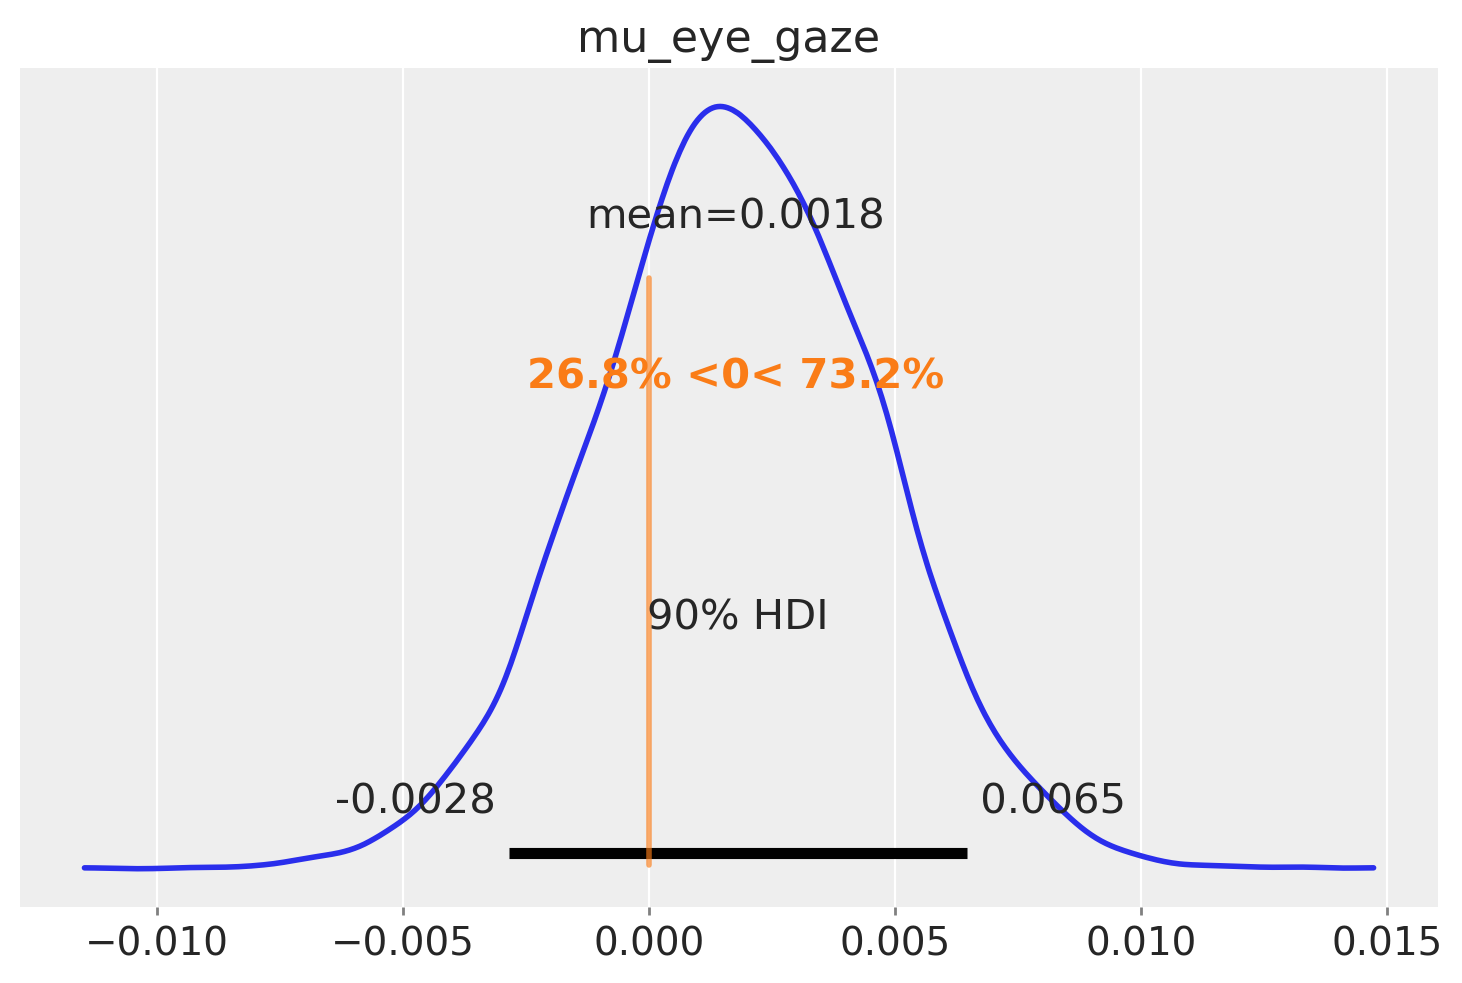

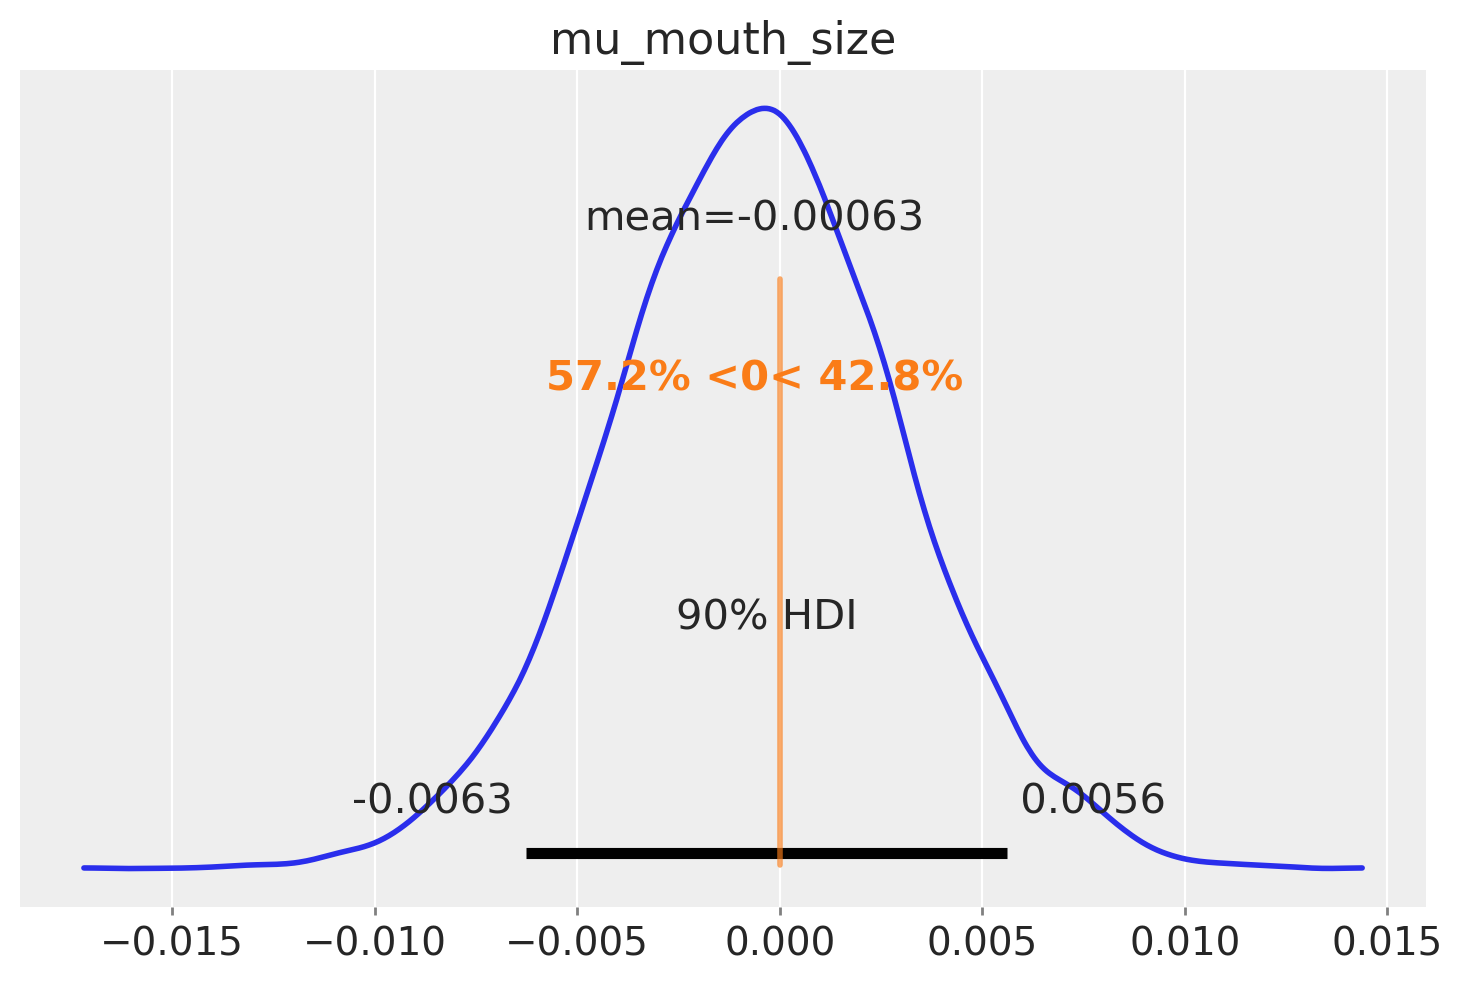

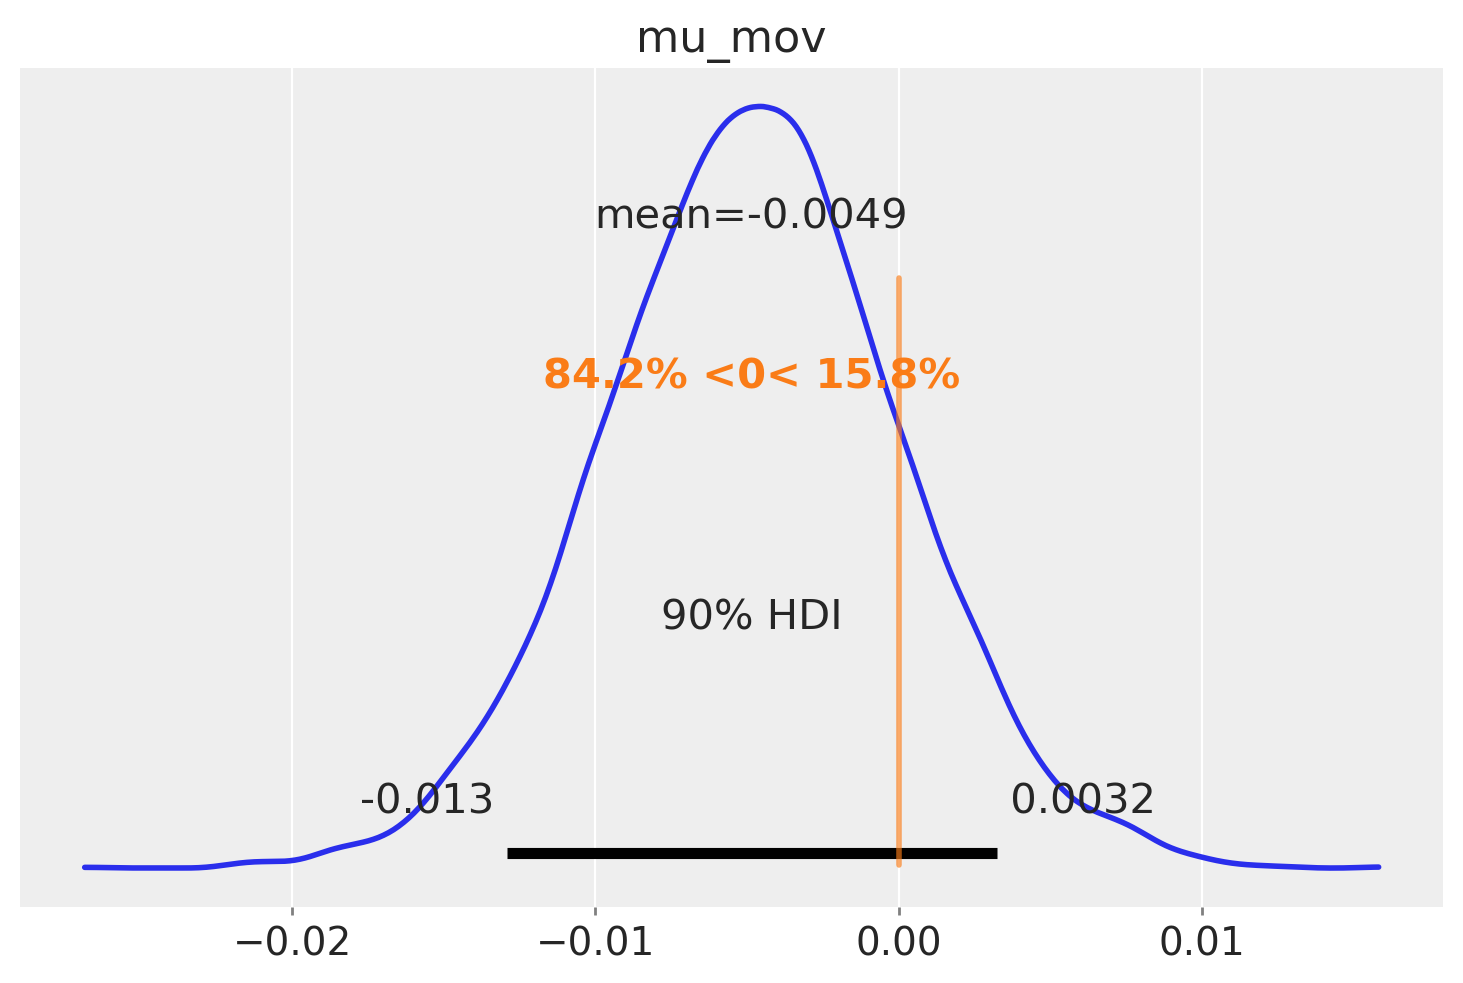

In [5]:
root_dir = "E:\\Projects\\IBS\\Results\\EEG\\Brain_behavior_glm_power_freqwise\\no_aggressive_CAR_ASR_10_ICA_appended_trials\\figures\\"
fig = plt.figure()
ax = fig.add_subplot(111)
a = az.plot_posterior(hierarchical_trace_clust_3, var_names=["mu_eye_gaze"],ref_val=0,linewidth=2,ax =ax,hdi_prob=0.90)
# fig.savefig(root_dir + "GLM_cluster_3_eye_insta_abs_detrend_smile_cor7.eps",format='eps')
fig = plt.figure()
ax = fig.add_subplot(111)
a = az.plot_posterior(hierarchical_trace_clust_3, var_names=["mu_mouth_size"],ref_val=0,linewidth=2,ax =ax,hdi_prob=0.90)
# fig.savefig(root_dir + "GLM_cluster_3_mouth_insta_abs_detrend_smile_cor7.eps",format='eps')
fig = plt.figure()
ax = fig.add_subplot(111)
a = az.plot_posterior(hierarchical_trace_clust_3, var_names=["mu_mov"],ref_val=0,linewidth=2,ax =ax,hdi_prob=0.90)
# fig.savefig(root_dir + "GLM_cluster_3_mov_insta_abs_detrend_smile_cor7.eps",format='eps')



C:\Users\Atesh\Anaconda3\envs\pymc\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\Atesh\Anaconda3\envs\pymc\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\Atesh\Anaconda3\envs\pymc\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model contex

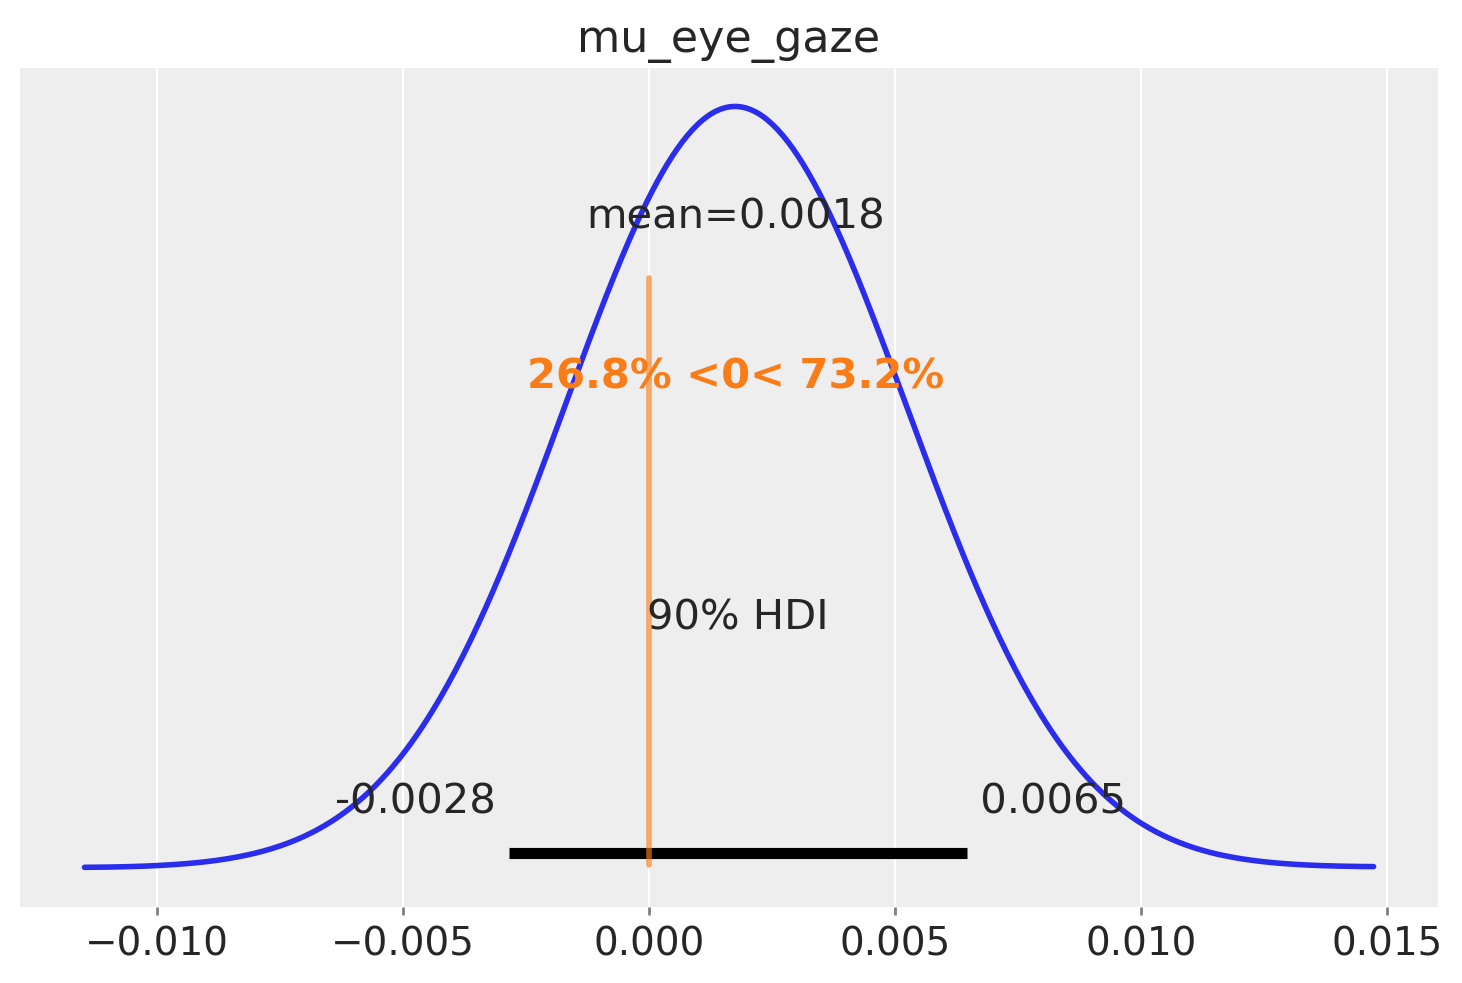

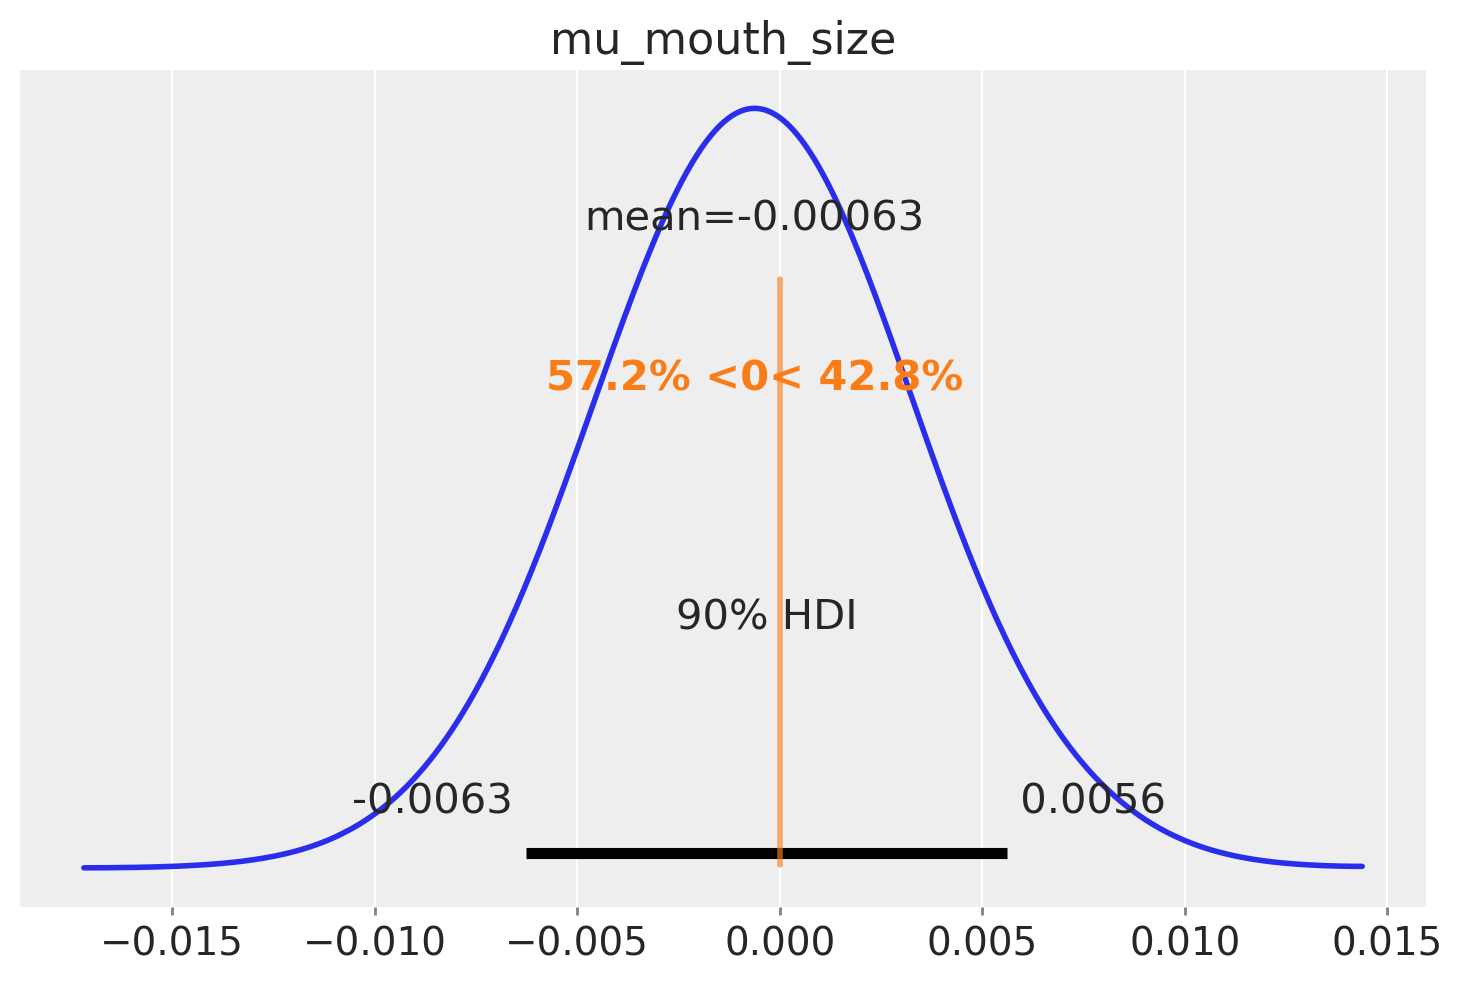

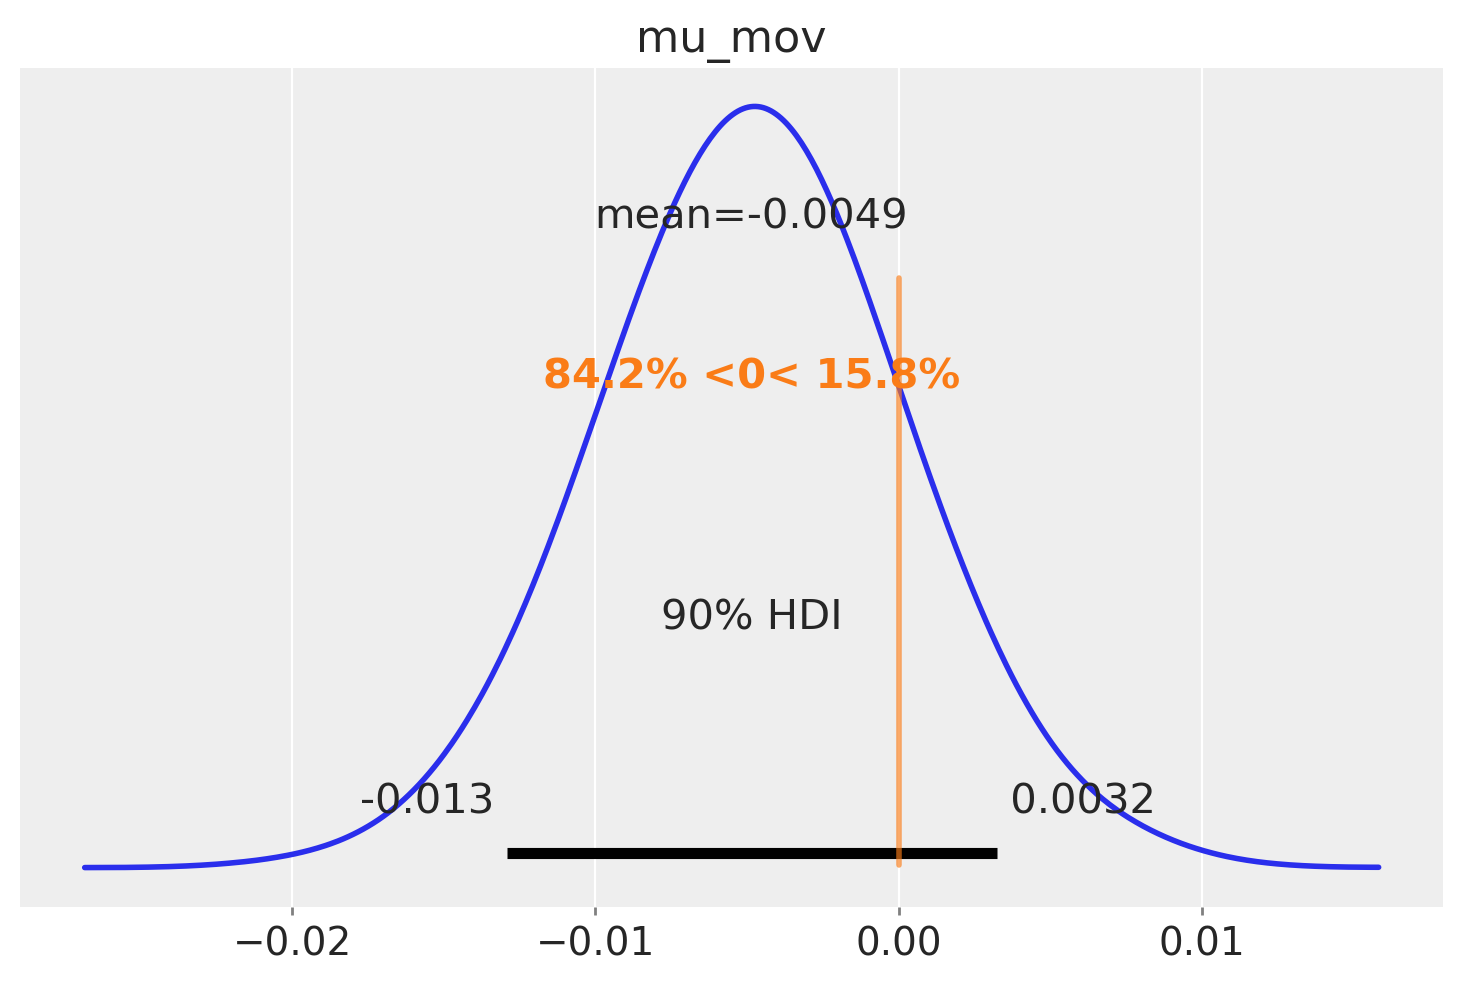

In [8]:
root_dir = "E:\\Projects\\IBS\\Results\\EEG\\Brain_behavior_glm_power_freqwise\\no_aggressive_CAR_ASR_10_ICA_appended_trials\\figures\\"
fig = plt.figure()
ax = fig.add_subplot(111)
a = az.plot_posterior(hierarchical_trace_clust_3, var_names=["mu_eye_gaze"],ref_val=0,linewidth=2,ax =ax,hdi_prob=0.90,bw=0.002)
# fig.savefig(root_dir + "GLM_cluster_3_eye_insta_abs_detrend_smile_cor7.eps",format='eps')
fig = plt.figure()
ax = fig.add_subplot(111)
a = az.plot_posterior(hierarchical_trace_clust_3, var_names=["mu_mouth_size"],ref_val=0,linewidth=2,ax =ax,hdi_prob=0.90,bw=0.002)
# fig.savefig(root_dir + "GLM_cluster_3_mouth_insta_abs_detrend_smile_cor7.eps",format='eps')
fig = plt.figure()
ax = fig.add_subplot(111)
a = az.plot_posterior(hierarchical_trace_clust_3, var_names=["mu_mov"],ref_val=0,linewidth=2,ax =ax,hdi_prob=0.90,bw=0.002)
# fig.savefig(root_dir + "GLM_cluster_3_mov_insta_abs_detrend_smile_cor7.eps",format='eps')



In [22]:
# az.rhat(hierarchical_trace_clust_1)

In [23]:
# pm.plot_trace(hierarchical_trace_clust_1, var_names=["mu_eye_gaze","mu_mouth_size", "mu_mov"]);

In [24]:
# pm.plot_trace(hierarchical_trace_clust_2, var_names=["mu_eye_gaze","mu_mouth_size", "mu_mov"]);

In [25]:
# az.rhat(hierarchical_trace_clust_2)

In [26]:
#  az.hdi(hierarchical_trace_clust_2,  var_names=["mu_eye_gaze","mu_mouth_size", "mu_mov"])

In [ ]:
# az.plot_posterior(hierarchical_trace_clust_2, var_names=["mu_eye_gaze","mu_mouth_size", "mu_mov"], ref_val=0)

In [ ]:
# pm.model_graph.model_to_graphviz(hierarchical_model_clust_2)

In [ ]:
# with hierarchical_model_clust_1:
#     post_pred_clust_1 = pm.sample_posterior_predictive(hierarchical_trace_clust_1)
# # add posterior predictive to the InferenceData
# az.concat(hierarchical_trace_clust_1, az.from_pymc3(posterior_predictive=post_pred_clust_1), inplace=True)

In [ ]:
# hierarchical_trace_clust_1_az = az.from_pymc3(hierarchical_trace_clust_1)

In [ ]:
# with hierarchical_model_clust_1_null:
#     hierarchical_trace_clust_1_null = pm.load_trace(".pymc_3.trace")

In [ ]:
# len(hierarchical_trace_clust_1_null['intercept'])

In [ ]:
# hierarchical_trace_clust_1_null_az_model = az.from_pymc3(hierarchical_trace_clust_1_null)

In [ ]:
# az.loo(hierarchical_trace_clust_1_null_az_model,hierarchical_model_clust_1_null)

In [ ]:
# with hierarchical_model_clust_1:
#     hierarchical_trace_clust_1 = pm.load_trace(".pymc_4.trace")

In [ ]:
# hierarchical_trace_clust_1_az_model = az.from_pymc3(hierarchical_trace_clust_1)

In [ ]:
# az.loo(hierarchical_trace_clust_1_az_model,hierarchical_model_clust_1)

In [ ]:
# hierarchical_trace_clust_1_az_model.to_netcdf('hierarchical_trace_clust_1_az_model')

In [ ]:
# hierarchical_trace_clust_1_null_az_model.to_netcdf('hierarchical_trace_clust_1_null_az_model')

In [ ]:
# hierarchical_trace_clust_1_az_model = az.from_netcdf('hierarchical_trace_clust_1_az_model')
# hierarchical_trace_clust_1_null_az_model.to_netcdf('hierarchical_trace_clust_1_null_az_model')

In [ ]:
# df_comp_loo = az.compare({"hierarchical": hierarchical_trace_clust_1_az_model, "pooled": hierarchical_trace_clust_1_null_az_model})
# df_comp_loo

In [ ]:
# print(np.sum(hierarchical_trace_clust_1['mu_eye_gaze']<0)/len(hierarchical_trace_clust_1['mu_eye_gaze']))

In [ ]:
# with hierarchical_model_clust_2:
#     post_pred_clust_2 = pm.sample_posterior_predictive(hierarchical_trace_clust_2)
# # add posterior predictive to the InferenceData
# az.concat(hierarchical_trace_clust_2, az.from_pymc3(posterior_predictive=post_pred_clust_2), inplace=True)